In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

#### Pbm 1

In [14]:
iris = data('iris')

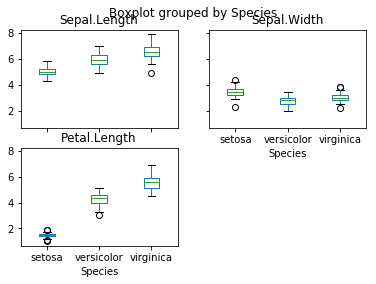

In [22]:
iris.boxplot(['Sepal.Length', 'Sepal.Width', 'Petal.Length'], 
             by='Species', grid=False)
plt.show()

Ans 1: Setosa is easiest to distinuish from the others as it has much smaller petal length.

Ans 2: We could identify by categorizing the petal length into three groups.

In [29]:
#data('poisons', show_doc=True)

In [27]:
poisons = data('poisons')
poisons

,time,poison,treat
1,0.31,1,A
2,0.45,1,A
3,0.46,1,A
4,0.43,1,A
5,0.36,2,A
6,0.29,2,A
7,0.40,2,A
8,0.23,2,A
9,0.22,3,A
10,0.21,3,A


In [36]:
poisons.groupby('poison')['time'].mean()

poison
1    0.617500
2    0.544375
3    0.276250
Name: time, dtype: float64

In [37]:
poisons.groupby('treat')['time'].mean()

treat
A    0.314167
B    0.676667
C    0.392500
D    0.534167
Name: time, dtype: float64

Ans 1: In general, poison 3 is most deadly and treatment B is most effective.

In [38]:
poisons.groupby(['poison','treat'])['time'].mean()

poison  treat
1       A        0.4125
        B        0.8800
        C        0.5675
        D        0.6100
2       A        0.3200
        B        0.8150
        C        0.3750
        D        0.6675
3       A        0.2100
        B        0.3350
        C        0.2350
        D        0.3250
Name: time, dtype: float64

Ans 2: Treatment B is better no matter which poison it was.

In [41]:
diamonds = data('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
diamonds.groupby('color')['price'].mean()

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

In [43]:
diamonds.groupby('cut')['price'].mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

Ans 1: Diamonds with Color J and premium cut have the highest average price

In [45]:
diamondsH = diamonds[diamonds['color']=='H']

In [46]:
diamondsH.groupby('cut').mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.219175,64.585149,58.696370,5135.683168,6.579373,6.497393,4.219373
Good,0.914729,62.499573,58.611111,4276.254986,5.968789,5.974245,3.726937
Ideal,0.799525,61.733194,55.965843,3889.334831,5.731377,5.740446,3.539917
Premium,1.016449,61.322034,58.792034,5216.706780,6.244508,6.228110,3.811699
Very Good,0.915948,61.968366,57.903015,4535.390351,5.982286,6.006272,3.713849


Ans 2: Ideal ones have lower carat than fair ones on average.

#### Pbm 2


In [56]:
titanic = pd.read_csv('titanic.csv')
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.dropna(inplace=True)

In [57]:
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass')

Pclass,1.0,2.0,3.0
Sex,,,
female,0.964789,0.886792,0.490741
male,0.340782,0.146199,0.152439


In [59]:
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='count')

Pclass,1.0,2.0,3.0
Sex,,,
female,142,106,216
male,179,171,492


In [60]:
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='sum')

Pclass,1.0,2.0,3.0
Sex,,,
female,137.0,94.0,106.0
male,61.0,25.0,75.0


In [58]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

Pclass,1.0,2.0,3.0
Sex,,,
female,0.964789,0.886792,0.490741
male,0.340782,0.146199,0.152439


In [62]:
titanic.groupby('Embarked')['Survived'].mean()

Embarked
C    0.555556
Q    0.357724
S    0.332968
Name: Survived, dtype: float64

Ans 1: Peopl eembarking from C have higher survival rate.

In [65]:
titanic.pivot_table(values='Survived', index='Embarked', columns='Sex')

Sex,female,male
Embarked,,
C,0.902655,0.305732
Q,0.616667,0.111111
S,0.680412,0.170418


Ans 2: Female embarking from C has the highest survival rate, while male from Q has the lowest.

Ans 3: doesn't tell much about the significance

In [70]:
titanic.pivot_table(values='Survived', index='Embarked', columns='Pclass')

Pclass,1.0,2.0,3.0
Embarked,,,
C,0.687943,0.571429,0.366337
Q,0.666667,0.285714,0.353982
S,0.559322,0.417355,0.210526


In [72]:
age = pd.cut(titanic['Age'], [0, 12, 18, 80])

In [75]:
titanic.pivot_table(values='Survived', index=['Pclass', age], columns='Embarked')

Embarked                C         Q         S
Pclass Age                                   
1.0    (0, 12]   1.000000       NaN  0.750000
       (12, 18]  0.857143       NaN  0.888889
       (18, 80]  0.676692  0.666667  0.536585
2.0    (0, 12]   1.000000       NaN  1.000000
       (12, 18]  1.000000       NaN  0.312500
       (18, 80]  0.478261  0.285714  0.365854
3.0    (0, 12]   0.750000  0.000000  0.354167
       (12, 18]  0.500000  0.500000  0.234043
       (18, 80]  0.285714  0.362745  0.190476